# 탐색적 분석
+ exploratory data analysis : EDA
+ 본격적인 데이터 분석전에 데이터의 각 컬럼에 대한 이해와
+ 데이터의 결측치, 이상치 처리 및 필터링을 수행하고
+ 누구나 이해하기 쉬운 시각화를 수행하는 과정

In [1]:
# iris.csv를 spark 객체로 생성
iris = spark.read.csv('iris.csv', 
       header=False, inferSchema=True)
iris.show(5)

+---+---+---+---+------+
|_c0|_c1|_c2|_c3|   _c4|
+---+---+---+---+------+
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|4.7|3.2|1.3|0.2|setosa|
|4.6|3.1|1.5|0.2|setosa|
|5.0|3.6|1.4|0.2|setosa|
+---+---+---+---+------+
only showing top 5 rows



In [2]:
# 컬럼명 변경 : withColumnRenamed(기존이름, 새이름)
iris = iris.withColumnRenamed('_c0', 'Sepal Length')\
   .withColumnRenamed('_c1', 'Sepal Width')\
   .withColumnRenamed('_c2', 'Petal Length')\
   .withColumnRenamed('_c3', 'Petal Width')\
   .withColumnRenamed('_c4', 'Species')
iris.show(5)

+------------+-----------+------------+-----------+-------+
|Sepal Length|Sepal Width|Petal Length|Petal Width|Species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [3]:
# 데이터분석 함수 : avg, max, min, sum, count
# agg({컬럼명:집계함수})
meanVals = iris.agg({'Sepal Length':'avg', 
                     'Sepal Width':'avg'})
meanVals.show()

+-----------------+------------------+
|avg(Sepal Length)|  avg(Sepal Width)|
+-----------------+------------------+
|5.843333333333335|3.0540000000000007|
+-----------------+------------------+



In [4]:
maxVals = iris.agg({'Sepal Length':'max', 
                     'Sepal Width':'max'})
maxVals.show()

+-----------------+----------------+
|max(Sepal Length)|max(Sepal Width)|
+-----------------+----------------+
|              7.9|             4.4|
+-----------------+----------------+



In [5]:
# 데이터분석 함수2 : var_samp, stddev_samp, cor, corr
varVals = iris.agg({'Sepal Length':'var_samp', 
                     'Sepal Width':'var_samp'})
varVals.show()    # 표본분산

+----------------------+---------------------+
|var_samp(Sepal Length)|var_samp(Sepal Width)|
+----------------------+---------------------+
|    0.6856935123042518|   0.1880040268456377|
+----------------------+---------------------+



In [6]:
stddevVals = iris.agg({'Sepal Length':'stddev_samp', 
                     'Sepal Width':'stddev_samp'})
stddevVals.show()    # 표본표준편차

+-------------------------+------------------------+
|stddev_samp(Sepal Length)|stddev_samp(Sepal Width)|
+-------------------------+------------------------+
|       0.8280661279778637|     0.43359431136217375|
+-------------------------+------------------------+



In [7]:
covVals = iris.cov('Sepal Length', 
                     'Sepal Width')
covVals    # 공분산 : 두 변수간의 선형관계

-0.03926845637583896

In [8]:
corrVals = iris.corr('Sepal Length', 
                     'Sepal Width')
corrVals    # 상관계수 : 두 변수간의 상관관계

-0.10936924995064931

In [9]:
covVals = iris.cov('Petal Length', 
                     'Petal Width')
covVals    # 공분산 : 두 변수간의 선형관계

1.2963874720357942

In [10]:
corrVals = iris.corr('Petal Length', 
                     'Petal Width')
corrVals    # 상관계수 : 두 변수간의 상관관계

0.9627570970509666

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
iris2 = iris.toPandas()

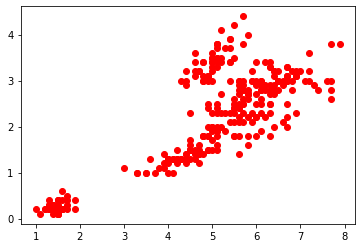

In [13]:
# 데이터의 외형 확인
# 산점도 : plot(x변수, y변수, 그래프옵션)
plt.plot(iris2['Sepal Length'], 
         iris2['Sepal Width'], 'ro')

plt.plot(iris2['Petal Length'], 
         iris2['Petal Width'], 'ro')


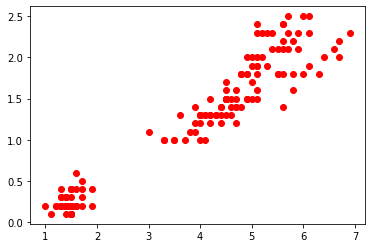

In [14]:
plt.plot(iris2['Petal Length'], 
         iris2['Petal Width'], 'ro')


<AxesSubplot:xlabel='Species', ylabel='count'>

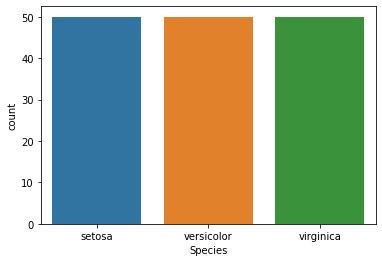

In [15]:
# 범주형 데이터 : 막대그래프
sns.countplot(data=iris2, x='Species')

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

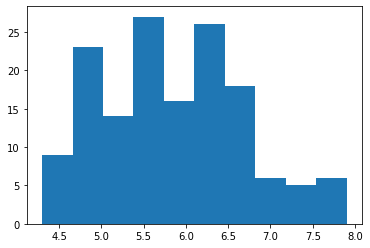

In [16]:
# 연속형 데이터 : 히스토그램
# hist(대상컬럼, 옵션)
plt.hist(iris2['Sepal Length'])

<AxesSubplot:xlabel='Sepal Length', ylabel='Density'>

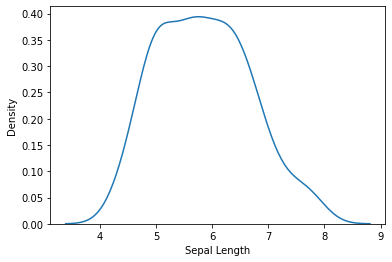

In [17]:
# 확률밀도 그래프 : kde
# kdeplot(변수, 데이터객체)
sns.kdeplot(data=iris2, x='Sepal Length')

In [18]:
# 데이터분석 함수3 : summary, describe
iris.summary().show()

[Stage 17:>                                                         (0 + 1) / 1]

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      Sepal Length|        Sepal Width|      Petal Length|       Petal Width|  Species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|     null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    25%|               5.1|                2.8|               1.6|               0.3|     null|
|    50%|               5.8|                3.0|               4.3|               1.3|     null|
|    75%|               6.4|                3.3|               5.1|               1.8|     null|
|    max|               7.9|  

In [19]:
from pyspark.sql.functions import col
iris.select(col('Sepal Length'), col('Sepal Width')).summary(['count','mean','min','max']).show()

+-------+-----------------+------------------+
|summary|     Sepal Length|       Sepal Width|
+-------+-----------------+------------------+
|  count|              150|               150|
|   mean|5.843333333333335|3.0540000000000007|
|    min|              4.3|               2.0|
|    max|              7.9|               4.4|
+-------+-----------------+------------------+



In [20]:
iris.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      Sepal Length|        Sepal Width|      Petal Length|       Petal Width|  Species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|     null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    max|               7.9|                4.4|               6.9|               2.5|virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [21]:
iris.describe(['Sepal Length','Sepal Width']).show()

+-------+------------------+-------------------+
|summary|      Sepal Length|        Sepal Width|
+-------+------------------+-------------------+
|  count|               150|                150|
|   mean| 5.843333333333335| 3.0540000000000007|
| stddev|0.8280661279778637|0.43359431136217375|
|    min|               4.3|                2.0|
|    max|               7.9|                4.4|
+-------+------------------+-------------------+

